In [ ]:
# 최초 API 연결 시 다음 라이브러리 설치해야함 
# pip install azure-cognitiveservices-vision-customvision

Create a new Python application

In [1]:
# Azure Custom vision 라이브러리, prediction
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient

# OpenAPI 스펙에 맞춰 authentication 처리하는 라이브러리
from msrest.authentication import ApiKeyCredentials

from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import os

Create variables for your resource's Azure endpoint and keys.

In [ ]:
# cv모델로 예측하기 위한 endpoint 지정


Authenticate the client

In [7]:
credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
predictor = CustomVisionPredictionClient(endpoint=prediction_endpoint, credentials=credentials)
# Test

Load image and get height, width and channels

In [8]:
image_file = "../../../custom-vision/Bungee/test-1.png"
print('Detecting objects in ', image_file)
image=Image.open(image_file)
h, w, ch = np.array(image).shape
print(h)
print(w)
print(ch)

Detecting objects in  ../../../custom-vision/Bungee/test-1.png
791
1410
3


Detect objects in the test image

In [9]:
with open(image_file, mode="rb") as image_data:
    results = predictor.detect_image(project_id, model_name, image_data)

# Display the results.    
for prediction in results. predictions:
    print("\t" + prediction.tag_name + ": {0:.2f}% bbox.left = {1:.2f}, bbox.top = {2:.2f}, bbox.width = {3:.2f}, bbox.height = {4:.2f}".format(prediction.probability * 100, prediction.bounding_box.left, prediction.bounding_box.top, prediction.bounding_box.width, prediction.bounding_box.height))

	bungee: 99.39% bbox.left = 0.08, bbox.top = 0.34, bbox.width = 0.62, bbox.height = 0.55
	bungee: 56.05% bbox.left = 0.58, bbox.top = 0.42, bbox.width = 0.42, bbox.height = 0.58
	bungee: 34.88% bbox.left = 0.01, bbox.top = 0.02, bbox.width = 0.12, bbox.height = 0.65
	bungee: 6.78% bbox.left = 0.62, bbox.top = 0.30, bbox.width = 0.36, bbox.height = 0.70
	bungee: 4.59% bbox.left = 0.12, bbox.top = 0.39, bbox.width = 0.88, bbox.height = 0.61
	bungee: 4.21% bbox.left = 0.00, bbox.top = 0.53, bbox.width = 0.03, bbox.height = 0.24
	bungee: 4.15% bbox.left = 0.11, bbox.top = 0.22, bbox.width = 0.56, bbox.height = 0.78
	bungee: 3.82% bbox.left = 0.00, bbox.top = 0.00, bbox.width = 0.16, bbox.height = 1.00
	bungee: 3.24% bbox.left = 0.02, bbox.top = 0.01, bbox.width = 0.42, bbox.height = 0.99
	bungee: 1.08% bbox.left = 0.72, bbox.top = 0.89, bbox.width = 0.28, bbox.height = 0.11


Create a figure for the results
Display the image with boxes around each detected object

Results saved in output.jpg


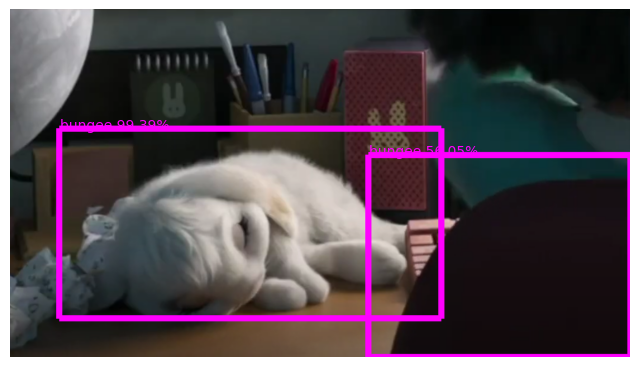

In [10]:
fig = plt.figure(figsize=(8,8))
plt.axis('off')

draw = ImageDraw.Draw(image)
lineWidth = int(w/100)
color = 'magenta'

for prediction in results. predictions:

    if (prediction.probability*100) > 50:
        left = prediction.bounding_box.left * w
        top = prediction.bounding_box.top * h
        width = prediction.bounding_box.width * w
        height = prediction.bounding_box.height * h

        points = ((left,top), (left+width,top), (left+width,top+height), (left,top+height),(left,top))
        draw.line(points, fill=color, width=lineWidth)
        plt.annotate(prediction.tag_name + ' {0:.2f}%'.format(prediction.probability * 100), (left, top), color=color)
        
plt.imshow(image)
outputfile = 'output.jpg'
fig. savefig(outputfile)
print('Results saved in', outputfile)